# General isotherm info

Before we start the characterisation, let's have a look at what we imported. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


For example, we know that some of the isotherms are measured with nitrogen at 77 kelvin, but don't know what the samples are. Let's print some of the properties.

In [2]:
[isotherm.material for isotherm in isotherms_n2_77k]

['MCM-41', 'NaY', 'SiO2', 'Takeda 5A', 'UiO-66(Zr)']

So we have a mesoporous templated silicate, a zeolite, some silica, a carbon and a common MOF. 

What about the isotherms which we'll use for isosteric calculations? Let's see what samples they are on and what temperatures they are at. We can use the standard print method on an isotherm for some detailed info.

In [3]:
print(isotherms_isosteric[0])
[isotherm.temperature for isotherm in isotherms_isosteric]

Material: TEST
Batch: TB
Adsorbate used: butane
Isotherm temperature: 298.15K
iso_type: isotherm
material_batch: TB
Units: 
	Unit for loading: mmol/g
	Unit for pressure: bar
Other properties: 
	is_real: True



[298.15, 323.15, 348.15]

Let's look at the isotherms that were measured in a combination with microcalorimetry. They have, besides the standard loading-pressure relationship, the enthalpy of adsorption measured directly. We can also use the `print_info` function to have a graph of the isotherm besides the regular info.

Material: HKUST-1(Cu)
Batch: Test
Adsorbate used: carbon dioxide
Isotherm temperature: 303.0K
iso_type: Calorimetrie
material_batch: Test
Units: 
	Unit for loading: mmol/g
	Unit for pressure: bar
Other properties: 
	date: 2010-05-21 00:00:00
	is_real: True
	lab: MADIREL
	machine: CV
	t_act: 150.0
	user: ADW



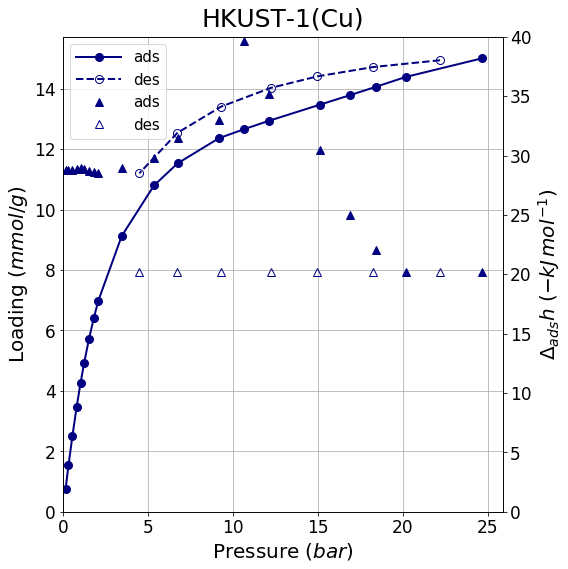

Material: Takeda 5A
Batch: Test
Adsorbate used: carbon dioxide
Isotherm temperature: 303.0K
iso_type: Calorimetrie
material_batch: Test
Units: 
	Unit for loading: mmol/g
	Unit for pressure: bar
Other properties: 
	is_real: True
	lab: MADIREL
	machine: CV
	t_act: 150.0
	user: ADW



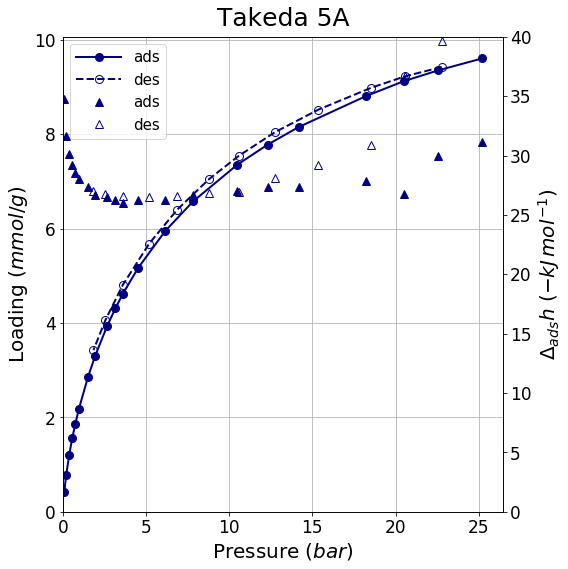

In [4]:
for isotherm in isotherms_calorimetry:
    isotherm.print_info(y2_range=(0,40))

So we have two carbon dioxide isotherms at room temperature: one on a MOF and one on a carbon sample.

For the iast isotherms, we'd like to plot them on the same graph, with the name of the adsorbate in the legend.

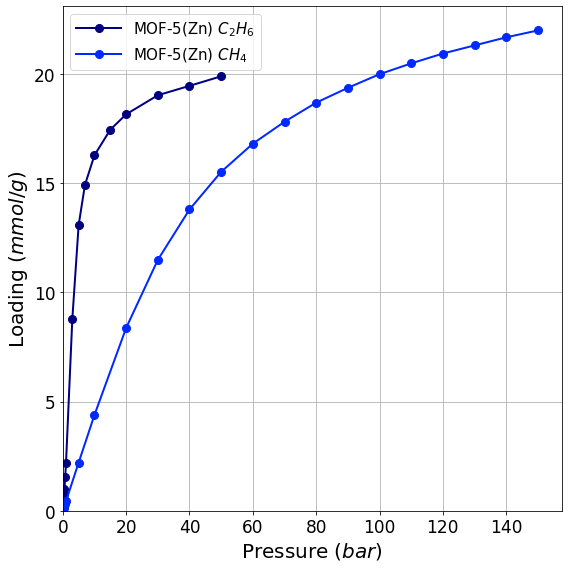

In [5]:
import matplotlib.pyplot as plt

pygaps.plot_iso(isotherms_iast, branch='ads',
               lgd_keys=['material','adsorbate'],
               )
plt.show()